In [1]:
import pandas as pd
import os
import inspect


# Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
script_directory = os.path.dirname(os.path.abspath(
inspect.getfile(inspect.currentframe())))

print(script_directory)
print("File location using os.getcwd():", os.getcwd())

C:\Users\ambreen.hanif\AppData\Local\Temp\ipykernel_37868
File location using os.getcwd(): c:\Users\ambreen.hanif\Github\slr_project\experiments\churn


In [3]:
def rename_files(file):
    file = file.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").replace(":", "_").replace(",", "_")
    return file.lower()

In [4]:
# print(os.chdir())
# os.chdir
path = '../../data/churn_examples/'
files = os.listdir(path)
print(files)


for index, file in enumerate(files):
    new_name = rename_files(file)
    print(new_name)
    os.rename(os.path.join(path, file), os.path.join(path, new_name))

['bank_customer_churn_prediction.csv', 'e_commerce_dataset.xlsx', 'telecom_customer_churn.csv', 'telecom_data_dictionary.csv', 'telecom_zipcode_population.csv']
bank_customer_churn_prediction.csv
e_commerce_dataset.xlsx
telecom_customer_churn.csv
telecom_data_dictionary.csv
telecom_zipcode_population.csv


In [11]:
telecom_data = pd.read_csv('../../data/churn_examples/telecom_customer_churn.csv')

In [12]:
telecom_data.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [6]:
import pycaret
pycaret.__version__

'3.1.0'

In [26]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(telecom_data.drop(columns=['Customer ID','Churn Category','Churn Reason'],axis=0), target = 'Customer Status', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Customer Status
2,Target type,Multiclass
3,Target mapping,"Churned: 0, Joined: 1, Stayed: 2"
4,Original data shape,"(7043, 35)"
5,Transformed data shape,"(7043, 46)"
6,Transformed train set shape,"(4930, 46)"
7,Transformed test set shape,"(2113, 46)"
8,Ordinal features,14
9,Numeric features,15


In [27]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [28]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [29]:
exp.setup(telecom_data, target = 'Customer Status', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Customer Status
2,Target type,Multiclass
3,Target mapping,"Churned: 0, Joined: 1, Stayed: 2"
4,Original data shape,"(7043, 38)"
5,Transformed data shape,"(7043, 72)"
6,Transformed train set shape,"(4930, 72)"
7,Transformed test set shape,"(2113, 72)"
8,Ordinal features,14
9,Numeric features,15


In [30]:
best = compare_models()

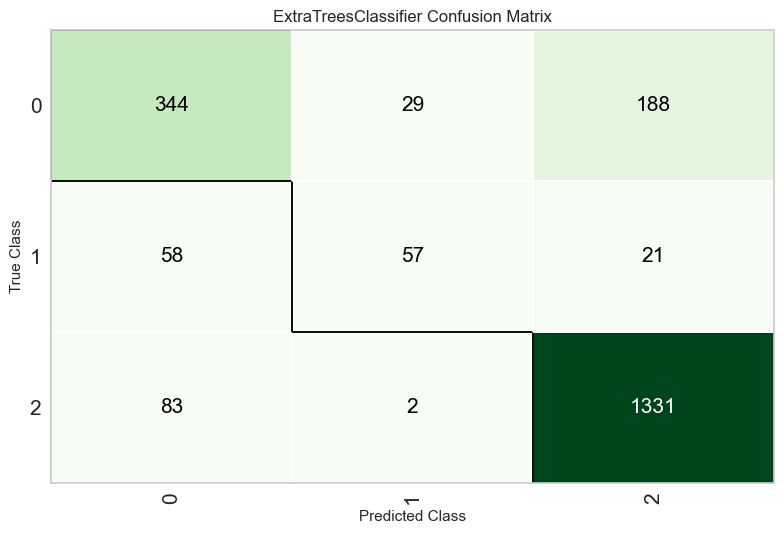

In [31]:
plot_model(best, plot = 'confusion_matrix')

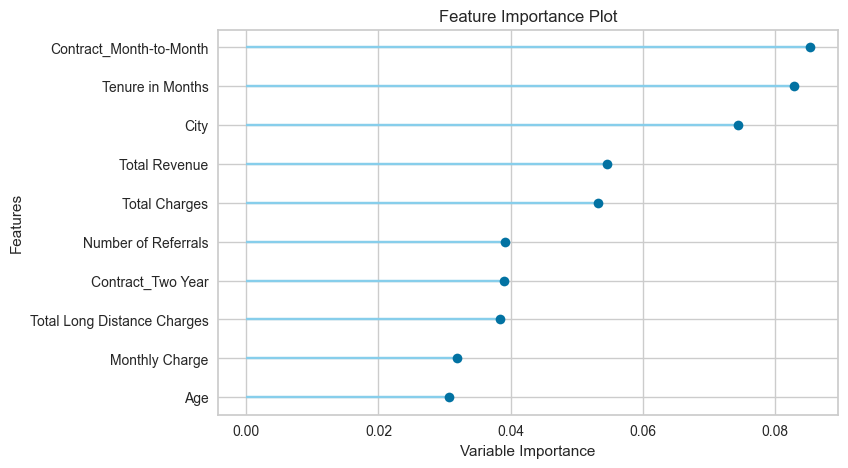

In [32]:
# plot feature importance
plot_model(best, plot = 'feature')